# Del 1: Pandas Time Series - Vaje

## Vaja 1

###  Import the necessary libraries

In [1]:
import numpy as np
import pandas as pd


### Import the dataset from URL and assign it to a variable apple

In [2]:
url = 'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv'

In [3]:
url

'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv'

In [4]:
apple = pd.read_csv(url)

In [5]:
apple.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


### Check out the type of the columns

In [6]:
apple.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Volume         int64
Adj Close    float64
dtype: object

### Transform the Date column as a datetime type

In [7]:

apple['Date'] = pd.to_datetime(apple['Date'], format = '%Y-%m-%d')

In [8]:
apple.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Volume                int64
Adj Close           float64
dtype: object

In [9]:
apple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8465 entries, 0 to 8464
Data columns (total 7 columns):
Date         8465 non-null datetime64[ns]
Open         8465 non-null float64
High         8465 non-null float64
Low          8465 non-null float64
Close        8465 non-null float64
Volume       8465 non-null int64
Adj Close    8465 non-null float64
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 463.0 KB


### Set the date as the index

In [10]:
apple = apple.set_index('Date')

In [11]:
apple.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


### Is there any duplicate dates?

In [12]:
apple.index.duplicated().sum()
#ni dupliciranih vrednosti

0

### Sort the index to be the first entry the oldest date

In [13]:
apple.sort_index(inplace=True,  ascending=False)

In [14]:
apple.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


### Get the last business day of each month

In [15]:
lastBD = pd.date_range(start= apple.index[-1], end = apple.index[0] , freq='BM')

In [16]:
lastBD

DatetimeIndex(['1980-12-31', '1981-01-30', '1981-02-27', '1981-03-31',
               '1981-04-30', '1981-05-29', '1981-06-30', '1981-07-31',
               '1981-08-31', '1981-09-30',
               ...
               '2013-09-30', '2013-10-31', '2013-11-29', '2013-12-31',
               '2014-01-31', '2014-02-28', '2014-03-31', '2014-04-30',
               '2014-05-30', '2014-06-30'],
              dtype='datetime64[ns]', length=403, freq='BM')

### What is the difference in days between the first day and the oldest

In [17]:
(apple.index[0] - apple.index[-1]).days

12261

### How many months in the data we have?

In [20]:
#preštejemo vse  mesece, ki se pojavijo v datasetu
monthsNum = len(apple.index.to_period('M').unique())
monthsNum

404

### Plot the 'Adj Close' value

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

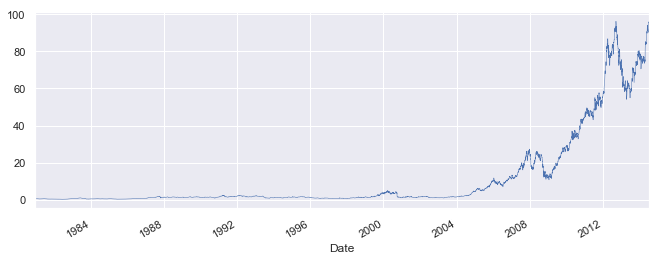

In [22]:
sns.set(rc={'figure.figsize':(11, 4)})
apple['Adj Close'].plot(linewidth = 0.5)
plt.show()